# HOMEWORK 5

In [147]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from networkx.algorithms import centrality
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import collections
import random
import igraph
import scipy

## 1. Data


In [148]:
hero_net  = pd.read_csv('D:\DataScience\ADM\homework5\hero-network.csv')

### 1.2 Data Preprocessing

In [149]:
hero_net.drop(hero_net[hero_net['hero1'] == hero_net['hero2']].index,inplace=True)

In [150]:
hero_net.apply(lambda  row :  row['hero1'].rstrip().rstrip('/'),axis=1)

0                LITTLE, ABNER
1                LITTLE, ABNER
2         BLACK PANTHER/T'CHAL
3                LITTLE, ABNER
4                LITTLE, ABNER
                  ...         
574462    COLOSSUS II/PETER RA
574463                CALLISTO
574464                CALLISTO
574465                 CALIBAN
574466    HULK/DR. ROBERT BRUC
Length: 572235, dtype: object

In [151]:
hero_net.apply(lambda  row :  row['hero2'].rstrip().rstrip('/'),axis=1)

0               PRINCESS ZANDA
1         BLACK PANTHER/T'CHAL
2               PRINCESS ZANDA
3               PRINCESS ZANDA
4         BLACK PANTHER/T'CHAL
                  ...         
574462                CALLISTO
574463                  ROGUE 
574464                 CALIBAN
574465                  ROGUE 
574466       MARKS, DR. SHIELA
Length: 572235, dtype: object

In [152]:
hero_net['hero1'] = hero_net.apply(lambda row :  'SPIDER-MAN/PETER PARKER' if(row['hero1'] == 'SPIDER-MAN/PETER PAR') else row['hero1'],axis=1)

In [153]:
hero_net['hero2'] = hero_net.apply(lambda row :  'SPIDER-MAN/PETER PARKER' if(row['hero2'] == 'SPIDER-MAN/PETER PAR') else row['hero2'],axis=1)

In [154]:
len(hero_net[hero_net['hero2'] =='SPIDER-MAN/PETER PAR' ])

0

In [155]:
hero_net.to_csv('hero.csv',index=False)

### First Graph

In [156]:
hero_net.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [157]:
len(hero_net)

572235

In [158]:
new = hero_net.groupby(['hero1','hero2']).hero2.count().reset_index(name="count") 

In [159]:
new.head()

,hero1,hero2,count
0,24-HOUR MAN/EMMANUEL,"FROST, CARMILLA",1
1,24-HOUR MAN/EMMANUEL,KILLRAVEN/JONATHAN R,1
2,24-HOUR MAN/EMMANUEL,M'SHULLA,1
3,3-D MAN/CHARLES CHAN,ANGEL/WARREN KENNETH,1
4,3-D MAN/CHARLES CHAN,ANT-MAN II/SCOTT HAR,1


In [160]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224169 entries, 0 to 224168
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   224169 non-null  object
 1   hero2   224169 non-null  object
 2   count   224169 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [161]:
G1 = nx.Graph()

In [162]:
new.apply(lambda row :  G1.add_edge(row['hero1'],row['hero2'],weight=1/row['count']),axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
224164    None
224165    None
224166    None
224167    None
224168    None
Length: 224169, dtype: object

In [163]:
nx.info(G1)

C:\Users\Marco\AppData\Local\Temp\ipykernel_20396\968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 6426 nodes and 167207 edges'

### Second Graph

In [164]:
nodes = pd.read_csv(r'D:\DataScience\ADM\homework5\nodes.csv')

In [165]:
edges = pd.read_csv('D:\DataScience\ADM\homework5\edges.csv')

In [166]:
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [167]:
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [168]:
G2 = nx.Graph()

In [169]:
nodes.apply(lambda row :  G2.add_node(row['node'],type = row['type']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
19085    None
19086    None
19087    None
19088    None
19089    None
Length: 19090, dtype: object

In [170]:
edges.apply(lambda row :  G2.add_edge(row['hero'],row['comic']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
96099    None
96100    None
96101    None
96102    None
96103    None
Length: 96104, dtype: object

In [171]:
nx.info(G2)

C:\Users\Marco\AppData\Local\Temp\ipykernel_20396\1976782796.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G2)


'Graph with 19091 nodes and 96104 edges'

In [172]:
attrs = {'SPIDER-MAN/PETER PARKER':{'type' : 'hero'}}

In [173]:
nx.set_node_attributes(G2,attrs)

In [174]:
G2.nodes['SPIDER-MAN/PETER PARKER']

{'type': 'hero'}

In [175]:
len(edges)

96104

In [176]:
len(nodes)

19090

## 2. Backend Implementation

**Top N heroes:** The top N heroes who have appeared in the most number of comics. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

In [111]:
N = 10

In [112]:
appearances = {node:G2.degree(node) for node in G2.nodes if G2.nodes[node]['type'] == 'hero'}

In [113]:
collab  = collections.Counter(appearances).most_common(N)

In [114]:
collab  ={x:v for x,v in collab}

In [115]:
top_N_heroes  = collab.keys()

In [116]:
top_N_heroes

dict_keys(['SPIDER-MAN/PETER PARKER', 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'HUMAN TORCH/JOHNNY S', 'MR. FANTASTIC/REED R', 'HULK/DR. ROBERT BRUC', 'WOLVERINE/LOGAN', 'INVISIBLE WOMAN/SUE'])

In [119]:
def top_N_heroes(G2, N):
    appearances = {node:G2.degree(node) for node in G2.nodes if G2.nodes[node]['type'] == 'hero'}
    collab  = collections.Counter(appearances).most_common(N)
    collab  ={x:v for x,v in collab}
    top_N_heroes  = collab.keys()
    return top_N_heroes

In [120]:
top_N_heroes(G2, 10)

dict_keys(['SPIDER-MAN/PETER PARKER', 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'HUMAN TORCH/JOHNNY S', 'MR. FANTASTIC/REED R', 'HULK/DR. ROBERT BRUC', 'WOLVERINE/LOGAN', 'INVISIBLE WOMAN/SUE'])

In [224]:
def subgraph(graph, N):
    if graph == G1:
        appearances = {node:graph.degree(node) for node in graph.nodes}
        collab  = collections.Counter(appearances).most_common(N)
        collab  ={x:v for x,v in collab}
        top_N_heroes  = collab.keys()
        sub_G = graph.subgraph(top_N_heroes)
    if graph == G2:
        appearances = {node:graph.degree(node) for node in graph.nodes}
        collab  = collections.Counter(appearances).most_common(N)
        collab  ={x:v for x,v in collab}
        top_N_heroes  = collab.keys()
        sub_G = nx.Graph()
        for i in top_N_heroes:
            sub_G.add_node(i)
        for edge in G2.edges():
            if ((edge[0] in top_N_heroes) and (edge[1] not in top_N_heroes)) or ((edge[1] in top_N_heroes) and (edge[0] not in top_N_heroes)):
                sub_G.add_edge(edge[0],edge[1])
    return sub_G

In [228]:
nx.info(subgraph(G2,10))

C:\Users\Marco\AppData\Local\Temp\ipykernel_20396\795869180.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(subgraph(G2,10))


'Graph with 6059 nodes and 10136 edges'

### Functionality 1 -  extract the graph's features


In [174]:
def get_graph_features(graph,graph_type,top_N_heroes):
    features = {}
    n_nodes  = nx.number_of_nodes(graph)
    features['number_of_nodes']  = n_nodes
    density  = nx.density(graph)
    features['density']  = density
    degree_sequence = sorted((d for n,d in graph.degree()),reverse=True)
    degrees =  np.array(degree_sequence)
    percentile  = np.percentile(degrees,95)
    if(graph_type==1):
        collaborations  = { node : graph.degree(node)  for node in graph.nodes() if node in top_N_heroes}
        features['collaborations']  = collaborations
        features['hubs']  = [ node for node in graph.nodes() if graph.degree(node) > percentile and node in top_N_heroes]
    else:
       appearances=  {node  : graph.degree(node) for node in graph.nodes if graph.nodes[node]['type'] == 'comic' }
       features['appearances']  = appearances
       features['hubs']  = [ node for node in graph.nodes() if graph.degree(node) > percentile and graph.nodes[node]['type'] == 'comic']
    features['degree_dist']  = degree_sequence
    features['average_degree']  = round(sum(degree_sequence)/len(degree_sequence))
    n  = len(graph.nodes())
    if( (n*(n-1))/2 - len(graph.edges()) < ((n*n-1)/2)/1000):
        is_dense = True
    else:
        is_dense  = False
    features['is_dense']  = is_dense
    return features

In [175]:
G1_features  =get_graph_features(G1,1,top_N_heroes)

In [43]:
G2_features  = get_graph_features(G2,2,top_N_heroes)

### Functionality 2 - Find top superheroes!

Centrality analysis is a set of techniques used to identify the most important nodes in a graph or network. A node is considered "central" if it has a high degree of connectivity, meaning it is connected to many other nodes in the network. There are several different measures of centrality that can be used, each of which looks at a different aspect of the node's connectivity and importance within the network.

Some common measures of centrality include:

Degree centrality: This measure looks at the number of connections a node has to other nodes in the network. Nodes with a high degree of centrality have many connections to other nodes, and are therefore considered central.

degree centrality(i) = number of arcs incident on node i / (total number of arcs in the graph - 1)

Betweenness centrality: This measure looks at the number of shortest paths between two nodes that pass through a particular node. Nodes with a high betweenness centrality are considered important because they are "bridges" between other nodes in the network.

Betweenness centrality(i) = Σ(s ≠ i ≠ t) / (s,t ∈ V) (σst / σst)
where:
- V is the set of nodes of the graph
- s and t are any two nodes in the graph
- σst is the number of minimum paths between s and t
- σst is the number of paths passing through node i between s and t

Closeness centrality: This measure looks at the distance from a particular node to all other nodes in the network. Nodes with a high closeness centrality are considered central because they are close to many other nodes in the network.

closeness centrality(i) = 1 / (sum of distances of i from all other nodes)


PageRank: this measure  identify the most important nodes based on the structure of the graph. It is based on the number and quality of the connections.

PageRank(p) = (1 - d) + d * (Sigma(PageRank(q) / number of outgoing links of q))
where:
- d is a constant representing the "damping factor," usually set to a value between 0 and 1.
- q is a page pointing to p
- PageRank(q) is the PageRank of the page q
- number of outgoing links of q is the number of links on page q pointing to other pages

Let's build a function that has in input the graph (G1 or G2), a node, one of the four proposed metrics, the N number of top superheroes that we want to consider and the graph G2 that we need to find the top N superheroes.

In [262]:
def centralities(graph, node, metrics, N, G2):
    
    # First of all we create a dictionary and we save the type of metric and the node, after we inizialize a variable (tot)
    #in zero and we create a subgraph given the graph in input and the N superheroes that we take in consideration.
    measures = {}
    measures["Metrics"] = metrics
    measures["Node"] = node
    tot = 0
    top_graph = subgraph(graph, N)
    top_heroes = top_N_heroes(G2, N)

    # If the node is in the subgraph, N is bigger than zero, we check the type of metrics that we need to use:
    if node in top_graph.nodes():
        if N >0:
            
            #Type: Degree Centrality
            if metrics == "DegreeCentrality":
                # This function calculate the values
                centrality = nx.degree_centrality(top_graph)
                # We create a cicle to scroll the centrality in all the nodes
                for nodes, centrality in centrality.items():
                    # If the node that we are iterating is the same of the one in input we save the value in our dictionary
                    if nodes == node:
                        measures["Value"] = centrality
                    # we sum all the values of the heroes nodes to compute the average
                    if nodes in top_heroes:
                        tot = tot + centrality 
                        
            #Type: Betweeness
            elif metrics == "Betweeness":
                centrality = nx.betweenness_centrality(top_graph)
                for nodes, centrality in centrality.items():
                    if nodes == node:
                        measures["Value"] = centrality
                    if nodes in top_heroes:
                        tot = tot + centrality
            
            #Type: Closeness Centrality
            elif metrics == "ClosenessCentrality":
                centrality = nx.closeness_centrality(top_graph)
                for nodes, centrality in centrality.items():
                    if nodes == node:
                        measures["Value"] = centrality
                    if nodes in top_heroes:
                        tot = tot + centrality
                  
            #Type: Page Rank
            elif metrics == "PageRank":
                centrality = nx.pagerank(top_graph)
                for nodes, centrality in centrality.items():
                    if nodes == node:
                        measures["Value"] = centrality
                    if nodes in top_heroes:
                        tot = tot + centrality
            else:
                raise ValueError("Metric not valid")
        else:
            raise ValueError("N is not a positive integer")

        # Let's compute the average in the network the metric that we considered and let's add it in the dictionary
        average = tot/len(top_graph)
        measures["Average"] = average

    else:
        raise ValueError("The node is not in the graph ")
     
    return measures

In [266]:
centrality = centralities(G2,'CAPTAIN AMERICA',"ClosenessCentrality",50, G2)

In [267]:
centrality

{'Metrics': 'ClosenessCentrality',
 'Node': 'CAPTAIN AMERICA',
 'Value': 0.3909143705233271,
 'Average': 0.0006201732264021322}

### Functionality 3 - Shortest ordered Route

Let's build a function that has in input the graph (Attention this function work only with the graph type == G2), the heroes, the first hero of the sequence, the last hero of the sequence and the N heroes that we want to consider. 

The goal is to implement an algorithm that returns the shortest walk going from a node h_j to a node h_n passing through nodes h in order.

In [329]:
def shortest_ordered_route(graph, heroes, first_hero, last_hero, N):
    
    if graph == G2:
        if N >0:
            # Let's add at the beginning of the sequence the first hero and the end of the sequence the last hero.
            # After we inizialize a list and a dictionary.
            heroes.append(last_hero)
            heroes.insert(0, first_hero)
            route = []
            short_route = {}

            # Let's do a for cicle in the heroes sequences
            for h in range(len(heroes)-1):

                # We compute the shortest path between the hero h and the hero h+1
                try:
                    path = nx.shortest_path(graph, heroes[h], heroes[h+1])

                # If there is no path because the graph is not connected we add in the dictionary and return the advise
                #"There is no such path".
                except:
                    attention = "There is no such path"
                    short_route["Attention"] = attention
                    return short_route

                # If all the nodes are connect we create a for cicle in "path" that contains all the sequence in order
                # with the heroes and the comics.
                for i in path:
                    # If i is not in heroes and so it is a comic we append it in the list route
                    if i not in heroes:
                        route.append(i)

            # let's add all the sequence of the comics in a dictionary and let's create a graph adding
            # the heroes and comics nodes.
            short_route["Comics in order"] = route
            my_graph = nx.DiGraph()
            my_graph.add_nodes_from(heroes)
            my_graph.add_nodes_from(route)

            # Let's do a for cicle, in this way we create edges between the comics and the previous and next heroes
            # that follow each other in the graph.
            for i in range(len(route)):
                my_graph.add_edge(heroes[i], route[i])
                my_graph.add_edge(route[i], heroes[i+1])

            # We color the nodes in green if they are superheroes and in orange if they are comics
            colors = {node: 'green' if node in heroes else 'orange' for node in my_graph.nodes}
            node_colors = [colors[node] for node in my_graph.nodes]

            # we save in box all the comics in order, the graph and the colors.
            box = [short_route, my_graph, node_colors]

        else:
            raise ValueError("N is not a positive integer")
    else:
        raise ValueError("The graph is not G2")
    return box

In [330]:
short_routes = shortest_ordered_route(G2, [ "SPIDER-MAN/PETER PARKER",'HAWK',"IRON MAN/TONY STARK",'DR. STRANGE/STEPHEN',"CAPTAIN AMERICA"], 'HULK/DR. ROBERT BRUC', "THOR/DR. DONALD BLAK", 50)

## 3. Frontend Visualization

### Visualization 1 - Visualize some features of the network

In [44]:
def visualize_features(features,graph_type):
    table  = '| Feature | Values |\n'
    table += '| ------- | ------- |\n'
    table += '| Number_of_nodes |'+ str(features['number_of_nodes'])+'|\n'
    table += '| Density |'+ str(round(float(features['density']),4))+'|\n'
    table += '| Average_degree |'+ str(features['average_degree'])+'|\n'
    table += '| Is_dense |'+ str(features['is_dense'])+'|\n'
    display(Markdown(table))
    table = '| Hubs |\n'
    table += '|-----|\n'
    for node in features['hubs']:
        table+='|'+str(node)+'|\n'
    display(Markdown(table))
    if(graph_type==1):
        collab  = {k:v for k,v in sorted(features['collaborations'].items(), key =  lambda item : item[1],reverse=True)}
        plt.figure(figsize=(30, 6), dpi=80)
        plt.title('Number of collaborations of each hero in descending order')
        plt.bar(collab.keys(),collab.values())
        plt.show()
    else:
        apps = {k:v for k,v in sorted(list(features['appearances'].items())[:50], key=lambda item:item[1],reverse=True)}
        plt.figure(figsize=(30, 6), dpi=80)
        plt.title('Number of heroes who appeared in each comic, sorted in descending order')
        plt.bar(apps.keys(),apps.values())
        plt.show()

            

| Feature | Values |
| ------- | ------- |
| Number_of_nodes |19091|
| Density |0.0005|
| Average_degree |10|
| Is_dense |False|


| Hubs |
|-----|
|A 10|
|A 118|
|A 12|
|A 15|
|A 16|
|A 173|
|A 188|
|A 18|
|A 19|
|A 1|
|A 21|
|A 305|
|A 310|
|A3 10|
|A3 11|
|A3 1|
|A 329|
|A3 2|
|A 332|
|A3 32|
|A 333|
|A3 33|
|A3 3|
|A3 43|
|A 345|
|A3 4|
|A 60|
|A 8|
|A '99|
|AF 110|
|AF 111|
|AF2 12|
|AF 61|
|AF 88|
|AF 90|
|AF 98|
|AR 1|
|AR 2|
|ASM 16|
|ASM 18|
|ASM 1|
|ASM2 1|
|ASM 280|
|ASM 400|
|A:T|
|AUP 4|
|AWC 82|
|AWC 84|
|CA 319|
|CA 342|
|CA 380|
|CA 383|
|CA 389|
|CA 390|
|CA 391|
|CA 401|
|COC 1|
|COC 3|
|DAMCON3 4|
|DAZZ 21|
|DD2 8|
|DEF 112|
|DEF 113|
|DEF 114|
|DEF 62|
|DEF 63|
|DEF 64|
|E2 12|
|FF 14|
|FF 150|
|FF 22|
|FF 23|
|FF 25|
|FF3 23|
|FF3 27|
|FF 367|
|FF 368|
|FF 369|
|FF3 6|
|FF 370|
|FF3 7|
|FF 3|
|FF 400/2|
|FF 402|
|FF 416|
|FFU 10|
|H2 277|
|H2 278|
|H2 279|
|H2 434|
|HFH 16|
|HFH 8|
|HR:R 4|
|IG 2|
|IG 3|
|IG 4|
|IG 5|
|IG 6|
|IM3 1|
|IM '99|
|INH3 4|
|IW 1|
|IW 2|
|IW 3|
|IW 4|
|IW 5|
|IW 6|
|MARVELS 2|
|MAXSEC 1|
|MAXSEC 2|
|MAXSEC 3|
|M:DS 1|
|M:DS 2|
|M/GN 1|
|MK3 41|
|M/:LG 12|
|M/SHSW 10|
|M/SHSW 11|
|M/SHSW 12|
|M/SHSW 1|
|M/SHSW 2|
|M/SHSW 3|
|M/SHSW 4|
|M/SHSW 5|
|M/SHSW 6|
|M/SHSW 7|
|M/SHSW 8|
|M/SHSW 9|
|M/TIO 7|
|M/TIO 96|
|M/TU 4|
|MX '01|
|MX 12|
|MX 32|
|NFV.S 2|
|NM 2|
|NM 46|
|NM 51|
|NM 7|
|NM 86|
|NM 87|
|NW 1|
|NW 27|
|NW 9|
|O:MU|
|O:X|
|PP 27|
|Q 14|
|Q 23|
|Q 25|
|Q 28|
|Q 33|
|Q 38|
|Q 39|
|QS 11|
|QS 12|
|QS 6|
|ROM 65|
|ROM 66|
|S-M 23|
|S-M 75|
|ST 156|
|SWII 1|
|SWII 5|
|SWII 7|
|SWII 9|
|T 291|
|T 300|
|T 301|
|T 426|
|T 427|
|T 482|
|TB 10|
|TB 24|
|TB 25|
|TB 32|
|TB 44|
|TB 49|
|TB 6|
|TB 8|
|TB '97|
|TM/U 1|
|UTSM '97|
|UX 107|
|UX 108|
|UX 109|
|UX 10|
|UX 122|
|UX 12|
|UX 137|
|UX 13|
|UX 14|
|UX 157|
|UX 158|
|UX 15|
|UX 167|
|UX 175|
|UX 190|
|UX 191|
|UX 200|
|UX 201|
|UX 210|
|UX 223|
|UX 227|
|UX 240|
|UX 255|
|UX 272|
|UX 274|
|UX 275|
|UX 280|
|UX 294|
|UX 295|
|UX 296|
|UX 325|
|UX 335|
|UX 336|
|UX 350|
|UX 377|
|UX 379|
|UX 388|
|UX 5|
|UX 7|
|UX 8|
|UX 94|
|UX 98|
|UX 9|
|WCA 1|
|WIW 8|
|WM2 13|
|WM2 14|
|WM2 15|
|WOSM 50|
|WOSM 77|
|WOSM 78|
|WOSM 8|
|X 106|
|X 14|
|X 15|
|X 1|
|X 2|
|X 3|
|X 55|
|X 5|
|X 96|
|XCAL 125|
|XF 10|
|XF 2|
|XF 5|
|XF 6|
|XF 7|
|XF 84|
|XF 85|
|XFOR 16|
|XFOR 17|
|X:MW 1|
|X:PRIME|
|XSOS 2|


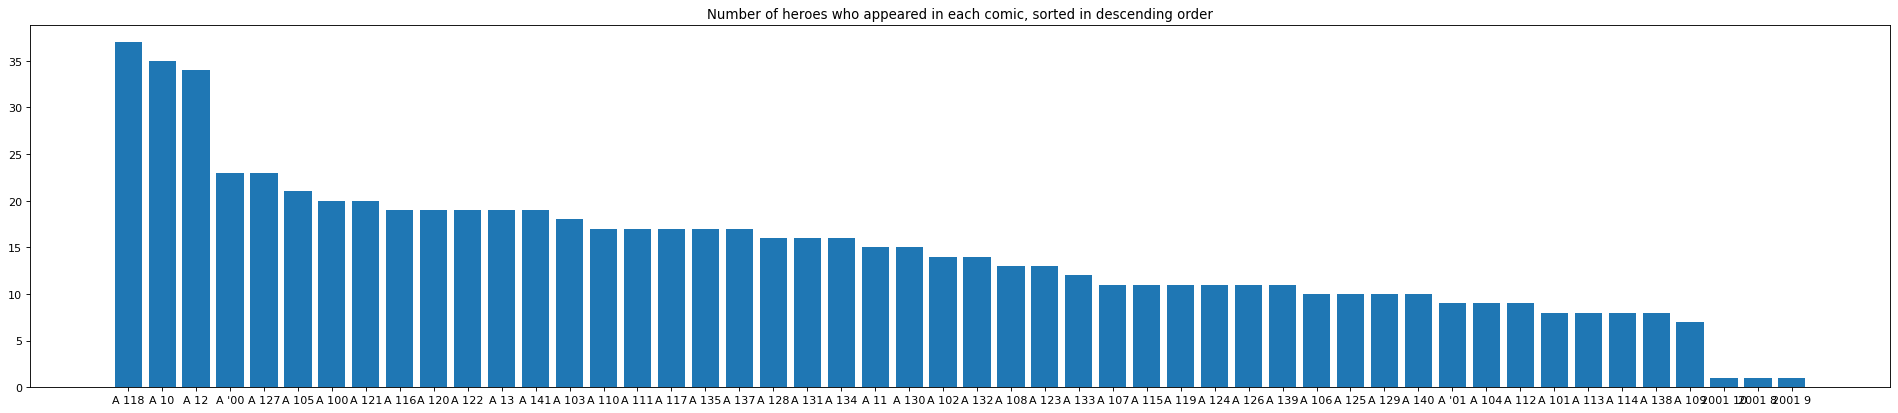

In [45]:
visualize_features(G2_features,2)

| Feature | Values |
| ------- | ------- |
| Number_of_nodes |6426|
| Density |0.0081|
| Average_degree |52|
| Is_dense |False|


| Hubs |
|-----|
|CAPTAIN AMERICA|
|CYCLOPS/SCOTT SUMMER|
|HAWK|
|THING/BENJAMIN J. GR|
|JAMESON, J. JONAH|
|THOR/DR. DONALD BLAK|
|DAREDEVIL/MATT MURDO|
|BEAST/HENRY &HANK& P|
|MR. FANTASTIC/REED R|
|HULK/DR. ROBERT BRUC|
|HUMAN TORCH/JOHNNY S|
|SPIDER-MAN/PETER PARKER|


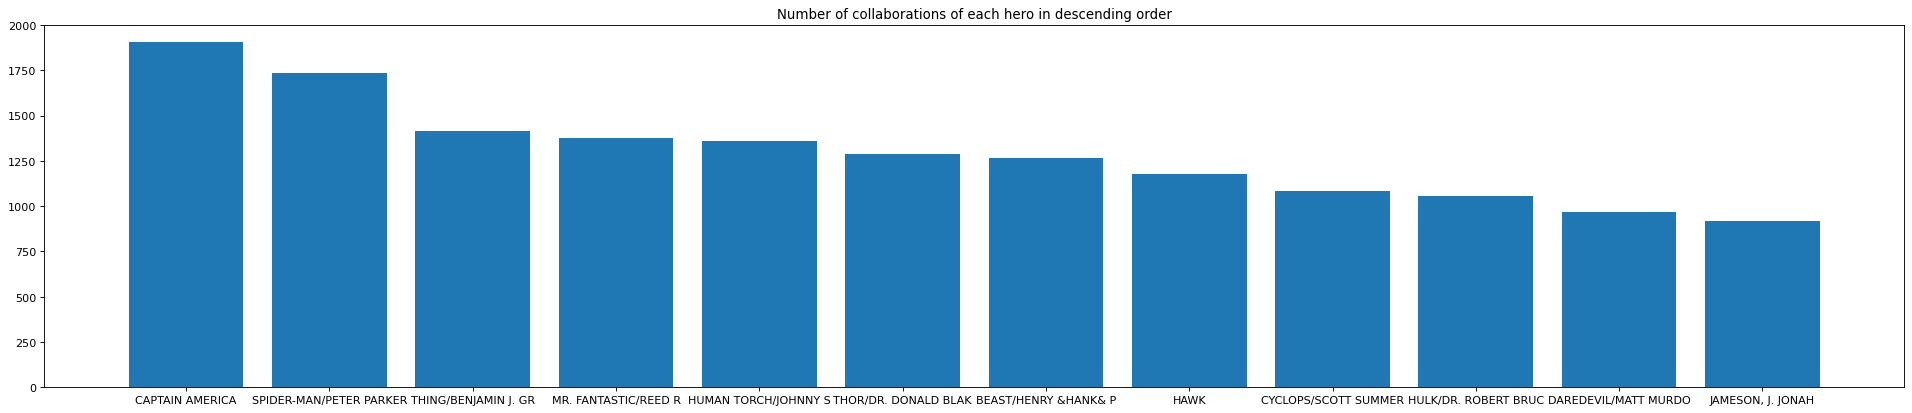

In [46]:
visualize_features(G1_features,1)

### Visualization 2 - Visualize centrality measure

In [279]:
def visualize_centralities(measures):
    table  = '| What | Info |\n'
    table += '| ------- | ------- |\n'
    table += '| Metric |'+ str(measures["Metrics"]) +'|\n'
    table += '| Node |'+ str(measures["Node"])+'|\n'
    table += '| Value for the node|'+ str(round(measures["Value"],4))+'|\n'
    table += "| Value for the network's average |"+ str(round(measures["Average"], 4)) +'|\n'
    display(Markdown(table))

In [280]:
visualize_centralities(centrality)

| What | Info |
| ------- | ------- |
| Metric |ClosenessCentrality|
| Node |CAPTAIN AMERICA|
| Value for the node|0.3909|
| Value for the network's average |0.0006|


In this example the metric that we used is the Closeness Centrality. We considered the node Captain America for the graph G2 and 50 top superheroes. The closeness centrality's value for this node is 0.3909, the average for the superheroes in the netowrk is 0.0006.

### Visualization 3 - Visualize the shortest-ordered route

In [343]:
def visualize_short_path(box):
    print(box[0])
    #Let's plot the graph
    pos = nx.planar_layout(box[1])
    nx.draw_networkx(box[1], arrowstyle = "-|>", pos = pos, connectionstyle="arc3,rad=0.1", with_labels=True, node_color=box[2], font_size = 5)
    plt.show()

{'Comics in order': ['A 118', 'A 118', "A '00", 'A 115', 'A 115', 'A 1']}


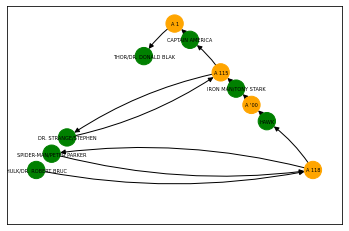

In [344]:
visualize_short_path(short_routes)

In this case we considered the sequence h ["SPIDER-MAN/PETER PARKER", 'HAWK', "IRON MAN/TONY STARK", 'DR. STRANGE/STEPHEN', "CAPTAIN AMERICA"], the starting node h1 = 'HULK/DR. ROBERT BRUC' and the last node = "THOR/DR. DONALD BLAK" considering 50 top superheroes.

In the graph it's visible the path that a reader has to do if he want to meet the superheroes in the given order. In green there are the superheroes and in orange the comics.

First of all, starting from Hulk he will read the comic "A 118", in this it will find Spider Man and at the same time Hawk. So he will pass to "A'00" and he will find Iron Man, he will go to read "A 115" where there is Iron Man as well as Dr. Strange, here he will find Captain America too. After reading "A 1" there will be Captain America and Thor. This will be the conclusion of our path.